# Praktikis Biletebi

In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./results.csv", encoding='utf-8')

In [3]:
df.value_counts()

id    question                                                                                                                                                                               imageURL                                                    answers.0                                                    answers.1                                                                                                                                 answers.2                                                             answers.3                                       correctAnswer                                                                                                                             correctAnswerIndex  explanation                                                                                                                                                                                                                                                                         

In [4]:
palette_color = sns.color_palette('pastel') 

<Axes: title={'center': 'Correct Answer Statistics'}, ylabel='count'>

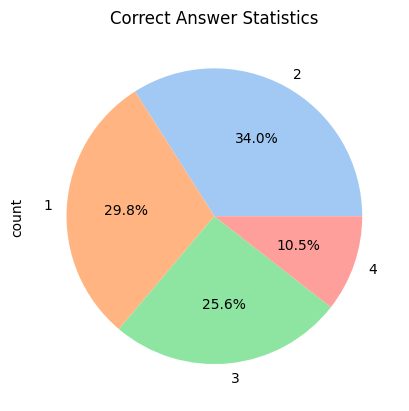

In [5]:
df["correctAnswerIndex"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=palette_color, title="Correct Answer Statistics")

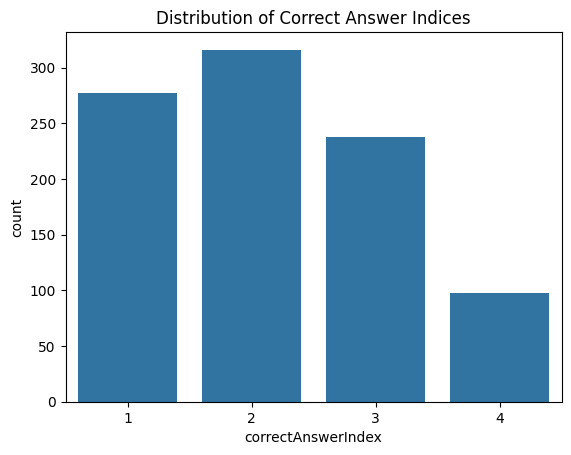

In [6]:
sns.countplot(x='correctAnswerIndex', data=df)
plt.title('Distribution of Correct Answer Indices')
plt.show()

In [7]:
def is_correct_answer_unique_starting_letter(row):
    # Extract all non-None answers
    answers = [row[f'answers.{i}'] for i in range(4) if pd.notna(row[f'answers.{i}'])]
    
    # Get the starting letters of all answers
    starting_letters = [answer[0] for answer in answers]
    
    # Count the frequency of each starting letter
    from collections import Counter
    letter_counts = Counter(starting_letters)
    
    # Check if all answers except one start with the same letter
    if len(letter_counts) == 2 and 1 in letter_counts.values():
        # Find the unique starting letter
        unique_letter = [letter for letter, count in letter_counts.items() if count == 1][0]
        
        # Find the index of the answer with the unique starting letter
        unique_index = starting_letters.index(unique_letter)
        
        # Check if this unique answer is the correct answer
        correct_answer_index = row['correctAnswerIndex']
        return unique_index == correct_answer_index
    return None

In [8]:
# Apply the function to each row
df['is_unique_starting_letter_correct'] = df.apply(is_correct_answer_unique_starting_letter, axis=1)

# Calculate the total number of rows where the condition is met
total_condition_met = df['is_unique_starting_letter_correct'].sum()
# Calculate the percentage of rows where the condition is met
percentage_condition_met = (total_condition_met / (df["is_unique_starting_letter_correct"].notna().sum())) * 100

print(f"Total rows where the condition is met: {total_condition_met}")
print(f"Percentage of rows where the condition is met: {percentage_condition_met:.2f}%")

Total rows where the condition is met: 48
Percentage of rows where the condition is met: 28.57%


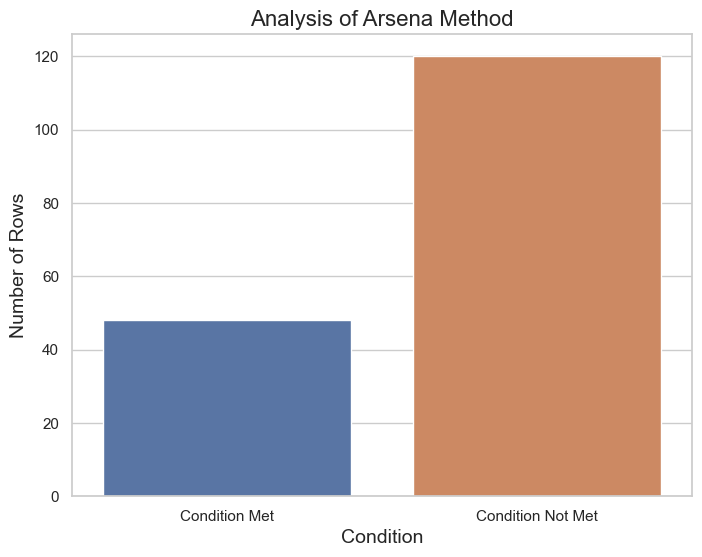

In [9]:
summary_data = {
    'Condition': ['Condition Met', 'Condition Not Met'],
    'Count': [total_condition_met, df["is_unique_starting_letter_correct"].notna().sum() - total_condition_met]
}
summary_df = pd.DataFrame(summary_data)

sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Condition', y='Count', data=summary_df, hue="Condition", legend=False)

# Add title and labels
plt.title('Analysis of Arsena Method', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)

# Show the plot
plt.show()